In [1]:
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

np.random.seed(42)
sns.set_style("darkgrid")

In [2]:
class GibbsSampler():
    def __init__(self, names, probs):
        self.names = names
        self.probs = probs
        self.num_var = len(names)
        assert(probs.shape[0] == self.num_var)      
        
    def sample(self, n, burn_in, thin_out):
        samples = np.zeros([n, self.num_var])
        values = np.random.randint(2, size=self.num_var)
        #values = np.zeros(self.num_var, dtype=np.int32)
        for i in range(n):
            var_idx = np.random.randint(self.num_var)
            u = np.random.uniform()
            if (probs[var_idx][tuple(values)] < u):
                values[var_idx] = 1 - values[var_idx]
            samples[i] = values
            
        if (burn_in != 0):
            samples = samples[burn_in:n]
        if (thin_out != 0):
            samples = samples[::thin_out]
        return samples

In [3]:
names = ['Cloudy', 'Rain']
probs_cloudy = np.array([[0.9524, 0.5556], [0.0476, 0.4444]])
# P(Cloudy=T|Rain=F)
print(f'P(Cloudy=T|Rain=F) = {probs_cloudy[1, 0]}')
# P(Cloudy=F|Rain=F)
print(f'P(Cloudy=F|Rain=F) = {probs_cloudy[0, 0]}')
# P(Cloudy=T|Rain=T)
print(f'P(Cloudy=T|Rain=T) = {probs_cloudy[1, 1]}')
# P(Cloudy=F|Rain=T)
print(f'P(Cloudy=F|Rain=T) = {probs_cloudy[0, 1]}')

print('\n')
probs_rain = np.array([[0.7844, 0.1852], [0.2156, 0.8148]])
probs_rain = np.array([[0.7844, 0.2156], [0.1852, 0.8148]])
# P(Rain=T|Cloudy=F)
print(f'P(Rain=T|Cloudy=F) = {probs_rain[0, 1]}')
# P(Rain=F|Cloudy=F)
print(f'P(Rain=F|Cloudy=F) = {probs_rain[0, 0]}')
# P(Rain=T|Cloudy=T)
print(f'P(Rain=T|Cloudy=T) = {probs_rain[1, 1]}')
# P(Rain=F|Cloudy=T)
print(f'P(Rain=F|Cloudy=T) = {probs_rain[1, 0]}')

probs = np.array([probs_cloudy, probs_rain])

sampler = GibbsSampler(names, probs)


P(Cloudy=T|Rain=F) = 0.0476
P(Cloudy=F|Rain=F) = 0.9524
P(Cloudy=T|Rain=T) = 0.4444
P(Cloudy=F|Rain=T) = 0.5556


P(Rain=T|Cloudy=F) = 0.2156
P(Rain=F|Cloudy=F) = 0.7844
P(Rain=T|Cloudy=T) = 0.8148
P(Rain=F|Cloudy=T) = 0.1852


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2368.47it/s]


mean = 0.33468000000000003
variance = 0.0128344976


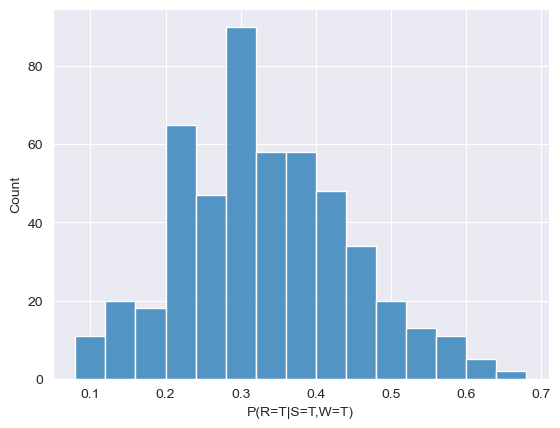

In [4]:
n = 100
burn_in = 0
thin_out = 0

mean = []
for i in tqdm(range(500)):
    samples = sampler.sample(n, burn_in, thin_out)
    mean.append(np.mean(samples[:,1]))
    
sns.histplot(mean)
plt.xlabel('P(R=T|S=T,W=T)')

print(f'mean = {np.mean(mean)}')
print(f'variance = {np.var(mean)}')
plt.savefig("Plots/histogram100.pdf")

In [5]:
def plot_freq(samples_list, var, plot_name):

    freq_list = []
    for samples in samples_list:
        n = samples.shape[0]
        freq = np.zeros_like(samples)
        for i in range(n):
            freq[i] = np.mean(samples[0:i+1], axis=0)
        freq_list.append(freq)
    
    for freq in freq_list:
        plt.plot(np.arange(freq.shape[0]), freq[:, var])
  
    plt.ylabel('Relative frequency')
    plt.xlabel('Iteration')
    
    plt.savefig(plot_name)
    

In [6]:
n = 50000
burn_in = 0
thin_out = 0

samples_list = []
for i in range(10):
    samples = sampler.sample(n, burn_in, thin_out)
    samples_list.append(samples)

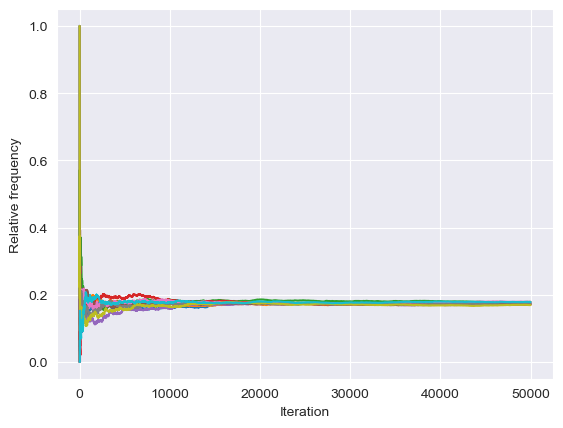

In [7]:
plot_freq(samples_list, 0, 'Plots/freqplot_cloudy.pdf')

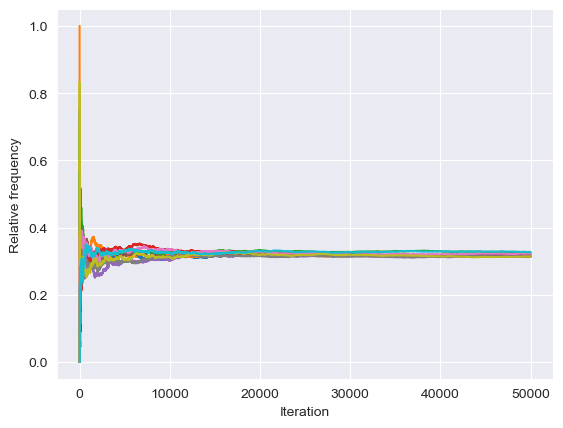

In [8]:
plot_freq(samples_list, 1, 'Plots/freqplot_rainy.pdf')

[0. 0. 0. ... 1. 1. 1.]


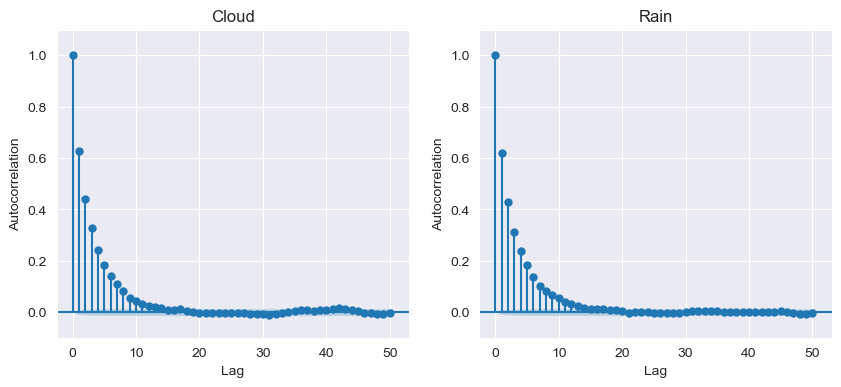

In [9]:
print(samples[:,1])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [10, 4])

plot_acf(samples[:,0], lags=50, ax=ax1, title='Cloud', auto_ylims=True)
ax1.set_xlabel("Lag")
ax1.set_ylabel("Autocorrelation")
plot_acf(samples[:,1], lags=50, ax=ax2, title='Rain', auto_ylims=True)
ax1.set_ylim([-0.1, 1.1])
ax2.set_ylim([-0.1, 1.1])
plt.ylabel('Autocorrelation')
plt.xlabel('Lag')

plt.savefig("Plots/autocorrelation.pdf")


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:22<00:00, 21.82it/s]


mean = 0.3196
variance = 0.0023514399999999998


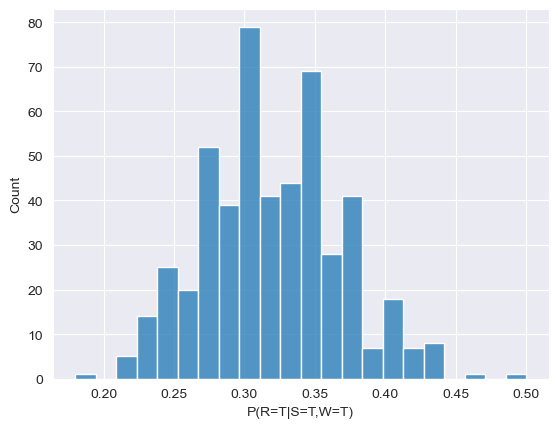

In [10]:
n = 11500
burn_in = 10000
thin_out = 15

mean = []
for i in tqdm(range(500)):
    samples = sampler.sample(n, burn_in, thin_out)
    mean.append(np.mean(samples[:,1]))
    
sns.histplot(mean)
plt.xlabel('P(R=T|S=T,W=T)')

print(f'mean = {np.mean(mean)}')
print(f'variance = {np.var(mean)}')
plt.savefig("Plots/histogram100_bt.pdf")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:21<00:00,  6.15it/s]


mean = 0.31994450693663296
variance = 7.984585953752405e-05


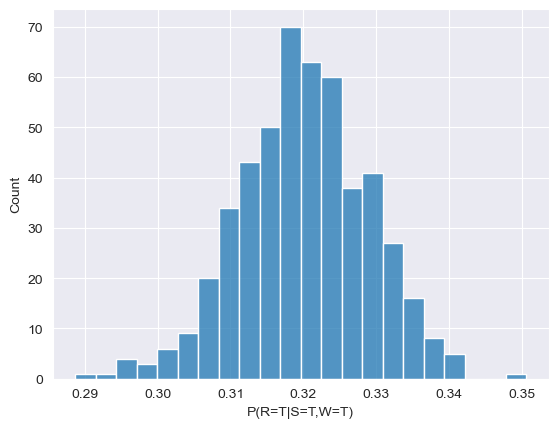

In [11]:
n = 50000
burn_in = 10000
thin_out = 15

mean = []
for i in tqdm(range(500)):
    samples = sampler.sample(n, burn_in, thin_out)
    mean.append(np.mean(samples[:,1]))
    
sns.histplot(mean)
plt.xlabel('P(R=T|S=T,W=T)')

print(f'mean = {np.mean(mean)}')
print(f'variance = {np.var(mean)}')
plt.savefig("Plots/histogram50000.pdf")

In [12]:
def gelman_rubin(samples_array):
    # samples_array.shape = [m, n, 2]
    m, n, _ = samples_array.shape
    
    intra_chain_mean = np.mean(samples_array, axis=1)
    intra_chain_variance = np.var(samples_array, axis=1)
    
    B = np.var(intra_chain_mean, axis=0)
    W = np.mean(intra_chain_variance, axis=0)
    V = ((n - 1) / n) * W + ((m + 1) / (m * n)) * B
    print(V)
    return np.sqrt(V / W)

In [13]:
def gelman_rubin(samples_array):
    # samples_array.shape = [m, n, 2]
    m, n, _ = samples_array.shape
    
    x_mean = np.mean(samples_array, axis=1)
    s_var = np.var(samples_array, axis=1)
    
    Bn = np.var(x_mean, axis=0)
    W = np.mean(s_var, axis=0)
    
    V = (n / (n - 1)) * W + Bn
    
    R = np.sqrt(V / W)
    return R
    

In [14]:
m = 100
n = 100
burn_in = 0
thin_out = 1

samples_array = np.zeros([m, n, 2])
samples_array = samples_array[:,burn_in:n,:]
samples_array = samples_array[:,::thin_out,:]
for i in tqdm(range(m)):
    samples = sampler.sample(n, burn_in, thin_out)
    samples_array[i] = samples
    
print(gelman_rubin(samples_array))
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2345.64it/s]


[1.03412353 1.0378074 ]


In [15]:
m = 100
n = 11500
burn_in = 10000
thin_out = 15

samples_array = np.zeros([m, n, 2])
samples_array = samples_array[:,burn_in:n,:]
samples_array = samples_array[:,::thin_out,:]
for i in tqdm(range(m)):
    samples = sampler.sample(n, burn_in, thin_out)
    samples_array[i] = samples
    
print(gelman_rubin(samples_array))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.70it/s]

[1.00930987 1.00953725]
